Final Codes

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
data = pd.read_excel('/content/embeddingsdata.xlsx')
df = pd.DataFrame(data)
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


A1. Merge your train & test sets and remove the class labels. Use k-means algorithm with k = 3 or 5 (based on your dataset) to form the clusters.

In [6]:
# it is not preferred to merge the train and test sets of the dataset as it avoids the performance of the model based on unseen data. Also result in data leakage, overfittng, etc.
# removing the class label from the dataset will make it an unnsupervised model to work with.

X = data.iloc[:, :-1]  #Features
y = data.iloc[:, -1]    #target data

# to obtain train and test set with features X and labels y
XTrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size= 0.2, random_state = 42)

# to merge the train and test set by concatenating X and y separately
mergedX = pd.concat([XTrain, Xtest], axis = 0)
mergedy = pd.concat([yTrain, yTest], axis = 0)

mergedData = pd.DataFrame(data=np.c_[mergedX, mergedy], columns=list(X.columns) + ['label'])    #to obtain the 2-D array where mergedX becomes the first of columns and mergedy becomes the last column

# reset the index of the merged DataFrame
mergedData.reset_index(drop=True, inplace=True)

# Display the merged dataset
print(mergedData.head())


    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0  0.038008  0.024533 -0.026641  ...  -0.013877  -0.014510  -0.046100   
1  0.039014  0.041787 -0.018391  ...   0.009059  -0.023725  -0.050698   
2  0.043218  0.037472 -0.017618  ...   0.016045  -0.033840  -0.040192   
3  0.016570  0.032675 -0.028541  ...   0.001953  -0.021908  -0.024885   
4  0.042262  0.029152 -0.027494  ...  -0.001227  -0.008715  -0.060270   

   embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  label  
0   0.017894   0.045380   0.01850

In [7]:
# to remove the class label

mergedDataWithoutLabels = mergedData.drop('label' , axis = 1)

print(mergedDataWithoutLabels.head())

    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_758  embed_759  embed_760  \
0  0.038008  0.024533 -0.026641  ...  -0.053615  -0.013877  -0.014510   
1  0.039014  0.041787 -0.018391  ...  -0.016817   0.009059  -0.023725   
2  0.043218  0.037472 -0.017618  ...  -0.021264   0.016045  -0.033840   
3  0.016570  0.032675 -0.028541  ...  -0.031825   0.001953  -0.021908   
4  0.042262  0.029152 -0.027494  ...  -0.040174  -0.001227  -0.008715   

   embed_761  embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  
0  -0.046100   0.017894   0.0

In [8]:
# for K - means clustering the dataset with no label to be used as this is an unsupervised model

# K - Means model with k=3
kMeans = KMeans(n_clusters=3, random_state=42)  # smaller value of K to create small clusters with larger number of clusters. This leads to over-generation.
                                                # when K is large, the algorithm produces a higher number of smaller clusters. This can lead to under-generalization.
                                                # in over-generation distinct patterns or groups within the data aren't identified.
                                                # under-generalization the algorithm identifies granular clusters that may not reflect the underlying structure of the data.
# Fit the model to your data
kMeans.fit(mergedDataWithoutLabels)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Add the cluster labels to the DataFrame
df_clusters = mergedDataWithoutLabels.copy()
df_clusters['Cluster'] = clusterLabels

# Display the DataFrame with cluster labels
print(df_clusters.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0  0.038008  0.024533 -0.026641  ...  -0.013877  -0.014510  -0.046100   
1  0.039014  0.041787 -0.018391  ...   0.009059  -0.023725  -0.050698   
2  0.043218  0.037472 -0.017618  ...   0.016045  -0.033840  -0.040192   
3  0.016570  0.032675 -0.028541  ...   0.001953  -0.021908  -0.024885   
4  0.042262  0.029152 -0.027494  ...  -0.001227  -0.008715  -0.060270   

   embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  Cluster  
0   0.017894   0.045380   0.018

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.3307784891428939


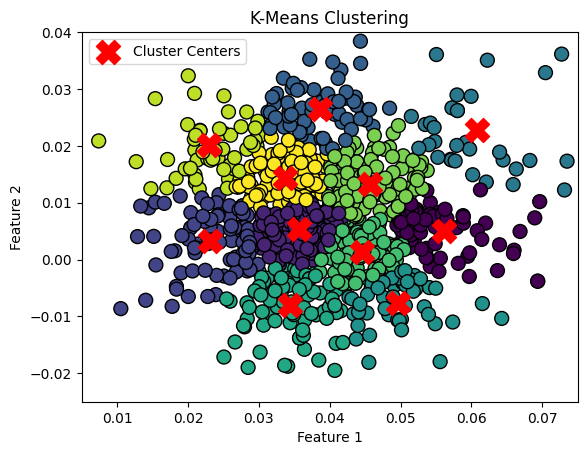

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Replace 'your_dataset.xlsx' with the path to your Excel file
excel_file_path = '/content/embeddingsdata.xlsx'

# Load the dataset from Excel
df = pd.read_excel(excel_file_path)

# Extract features (assuming you have two features for simplicity)
features = df[['embed_10', 'embed_26']].values

# Set the number of clusters
n_clusters = 11

# Fit the K-Means model
kMeans = KMeans(n_clusters=n_clusters, random_state=42)
kMeans.fit(features)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(features, clusterLabels)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clusters
plt.scatter(features[:, 0], features[:, 1], c=clusterLabels, cmap='viridis', edgecolors='k', s=100)
centers = kMeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=300, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(0.005, 0.075)
plt.ylim(-0.025, 0.04)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Replace 'your_dataset.xlsx' with the path to your Excel file
excel_file_path = '/content/embeddingsdata.xlsx'

# Load the dataset from Excel
df = pd.read_excel(excel_file_path)

# Get the feature columns
feature_columns = df.columns[1:]  # Assuming the first column is not a feature

# Set the number of clusters
n_clusters = 11

# Initialize variables to store the best pair and silhouette score
best_pair = None
max_silhouette_score = -1

# Iterate through all pairs of columns
for i in range(len(feature_columns)):
    for j in range(i + 1, len(feature_columns)):
        # Extract features for the current pair
        features_pair = df[[feature_columns[i], feature_columns[j]]].values

        # Fit the K-Means model
        kMeans = KMeans(n_clusters=n_clusters, random_state=42)
        kMeans.fit(features_pair)

        # Get the cluster labels for each data point
        cluster_labels = kMeans.labels_

        # Calculate silhouette score
        silhouette_avg = silhouette_score(features_pair, cluster_labels)

        # Update the best pair and silhouette score if the current pair is better
        if silhouette_avg > max_silhouette_score:
            max_silhouette_score = silhouette_avg
            best_pair = (feature_columns[i], feature_columns[j])

# Print the result
print(f"Best pair for maximum silhouette score: {best_pair}")
print(f"Maximum silhouette score: {max_silhouette_score}")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/py

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.2379938154632435


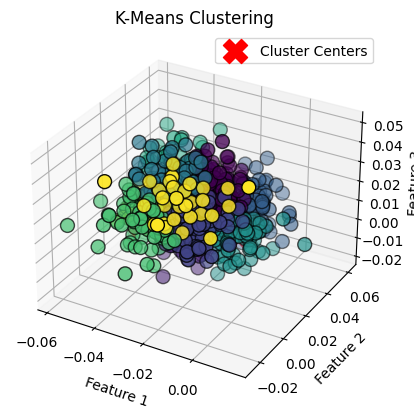

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing for 3D plotting
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Replace 'your_dataset.xlsx' with the path to your Excel file
excel_file_path = '/content/embeddingsdata.xlsx'

# Load the dataset from Excel
df = pd.read_excel(excel_file_path)

# Extract three features
features = df[['embed_110', 'embed_261', 'embed_451']].values  # Replace 'embed_XXX' with the third feature name

# Set the number of clusters
n_clusters = 11

# Fit the K-Means model
kMeans = KMeans(n_clusters=n_clusters, random_state=42)
kMeans.fit(features)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(features, clusterLabels)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=clusterLabels, cmap='viridis', edgecolors='k', s=100)
centers = kMeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='X', s=300, label='Cluster Centers')

ax.set_title('K-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.legend()
plt.show()


In [9]:
from sklearn.metrics import silhouette_score
# K - Means model with k=5
kMeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to your data
kMeans.fit(mergedDataWithoutLabels)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Add the cluster labels to the DataFrame
df_clusters = mergedDataWithoutLabels.copy()
df_clusters['Cluster'] = clusterLabels

# Display the DataFrame with cluster labels
print(df_clusters.head())
silhouette_avg = silhouette_score(mergedDataWithoutLabels, clusterLabels)
print(f"Silhouette Score: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0  0.038008  0.024533 -0.026641  ...  -0.013877  -0.014510  -0.046100   
1  0.039014  0.041787 -0.018391  ...   0.009059  -0.023725  -0.050698   
2  0.043218  0.037472 -0.017618  ...   0.016045  -0.033840  -0.040192   
3  0.016570  0.032675 -0.028541  ...   0.001953  -0.021908  -0.024885   
4  0.042262  0.029152 -0.027494  ...  -0.001227  -0.008715  -0.060270   

   embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  Cluster  
0   0.017894   0.045380   0.018

In [10]:
from sklearn.metrics import silhouette_score

# Assuming mergedDataWithoutLabels is your feature matrix

# Fit the K-Means model
kMeans.fit(mergedDataWithoutLabels)

# Get the cluster labels for each data point
clusterLabels = kMeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(mergedDataWithoutLabels, clusterLabels)
print(f"Silhouette Score: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.07049786165368678


In [ ]:
from sklearn.metrics import davies_bouldin_score

kMeans.fit(mergedDataWithoutLabels)
clusterLabels = kMeans.labels_
davies_bouldin = davies_bouldin_score(mergedDataWithoutLabels, clusterLabels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index: 4.02313464544192


A2. Determine the ideal k value for your dataset. Determine the clusters for a range of k ε[1,31]. Use elbow method to determine the ideal value of k based on average Euclidean distance from cluster center.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

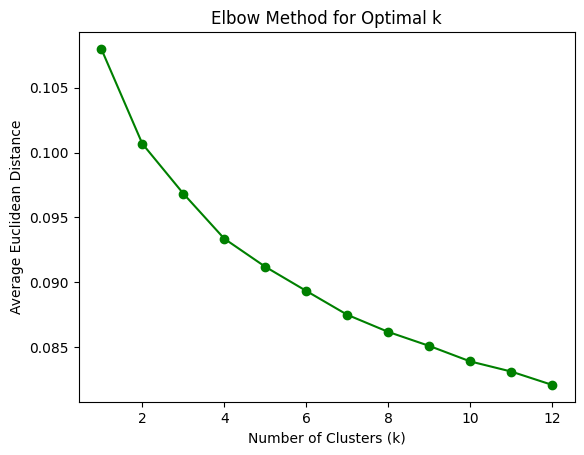

In [11]:
# Elbow method is used to find the optimal k value for a given cluster. The value of k choosen should be such that the distances when measured shouldn't be very large.
# The distances can be calculated in many different ways that includes euclidean and WCSS.
# On plotting the graph for various values of k the point on graph where the elbow or the curve noticed will be the required value of k to be choosen.

# Define a range of k values
kValues = list(range(1, 13))

# Calculate the average Euclidean distance for each k
averageDistances = []

for k in kValues:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(mergedDataWithoutLabels)
    # "kmeans.inertia_" performs the sum of squared of distances(euclidean distance) and when divided by the length of "mergedDataWithoutLabels" the average distance can be obtained
    averageDistances.append(kmeans.inertia_ / len(mergedDataWithoutLabels))

# Plot the elbow curve
plt.plot(kValues, averageDistances, marker='o', color='green')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance')
plt.show()

A3. Use Agglomerative Clustering for hierarchical clustering of your data. Plot the dendrogram to visualize the clusters.

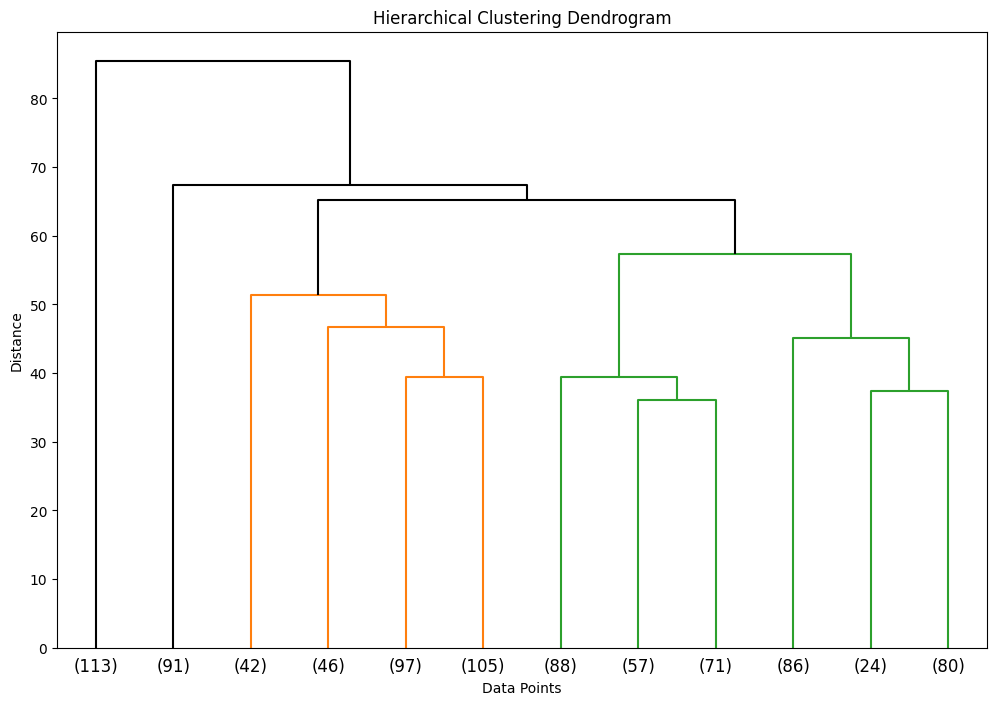

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Agglomerative Clustering aka hierarchical clustering that follows bottom-up approach
# distance_threshold to specify a threshold at which the merging stops
# n_clusters = none to ensure that the clustering is not based on numbers
# linkage = ward to specify that hierarchical clustering to measure the distances between the clusters
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')    # to form clusters
agg_labels = agg_cluster.fit_predict(mergedDataWithoutLabels)   # to train the model using .fit

# Create linkage matrix for the dendrogram
linkage_matrix = linkage(mergedDataWithoutLabels, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, color_threshold=None, above_threshold_color='k', truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


A4. Perform sequential feature selection algorithms for arriving at the optimal number of features needed for your dataset.

In [ ]:
# Elbow method is used to find the optimal k value for a given cluster. The value of k choosen should be such that the distances when measured shouldn't be very large.
# The distances can be calculated in many different ways that includes euclidean and WCSS.
# On plotting the graph for various values of k the point on graph where the elbow or the curve noticed will be the required value of k to be choosen.

# Define a range of k values
kValues = list(range(1, 100))

# Calculate the average Euclidean distance for each k
averageDistances = []

for k in kValues:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(mergedDataWithoutLabels)
    # "kmeans.inertia_" performs the sum of squared of distances(euclidean distance) and when divided by the length of "mergedDataWithoutLabels" the average distance can be obtained
    averageDistances.append(kmeans.inertia_ / len(mergedDataWithoutLabels))

# Plot the elbow curve
plt.plot(kValues, averageDistances, marker='o', color='green')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KeyboardInterrupt: ignored

DBSCAN

     Cluster
0          0
1          0
2          0
3          0
4          0
..       ...
895        0
896        0
897        0
898        0
899        0

[900 rows x 1 columns]


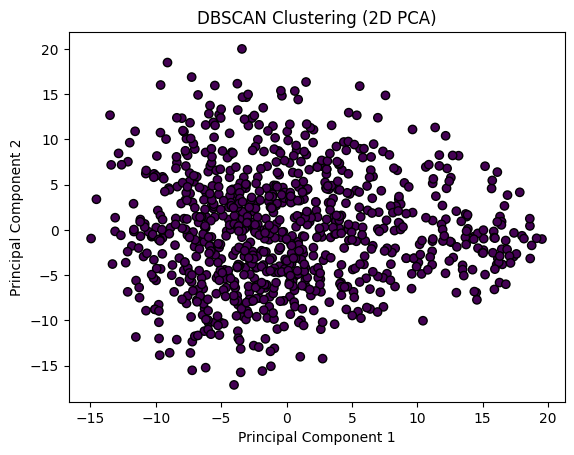

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'mergedDataWithoutLabels' is your dataset
features = mergedDataWithoutLabels

# Standardize the data
features_standardized = StandardScaler().fit_transform(features)

# Apply DBSCAN
dbscan = DBSCAN(eps=300, min_samples=769)
labels = dbscan.fit_predict(features_standardized)

# Add cluster labels to the dataframe
mergedDataWithoutLabels['Cluster'] = labels

# Display the resulting dataframe with cluster labels
print(mergedDataWithoutLabels[['Cluster']])

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_standardized)

# Create a scatter plot
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


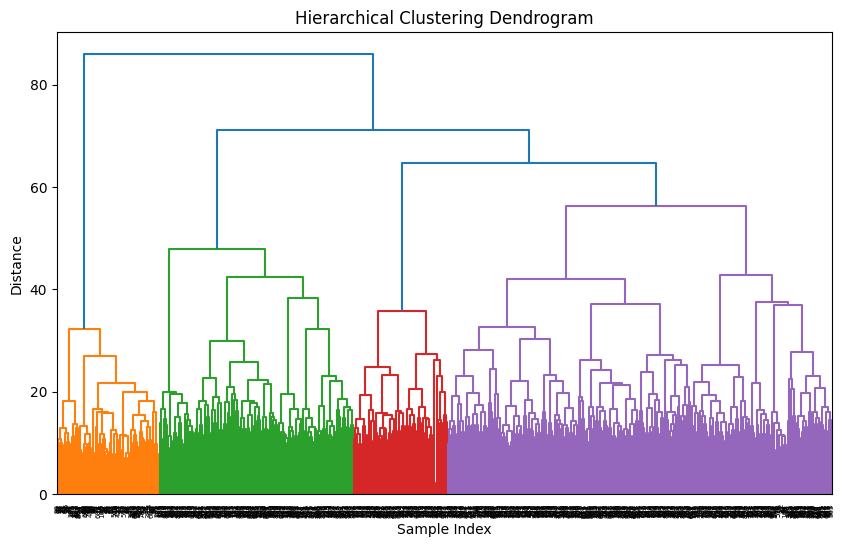

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


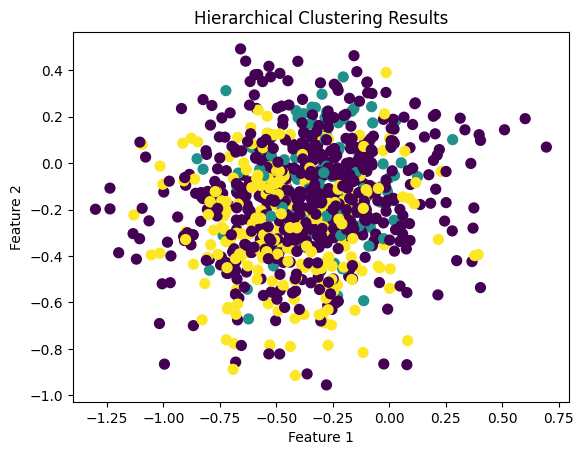

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
features = df.iloc[:, 1:].values  # Adjust the column indices as per your dataset

# Hierarchical clustering
linkage_matrix = linkage(features, method='ward')  # You can choose a different method as well

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering
n_clusters = 3  # Choose the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(features)

# Visualize the clustering results
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


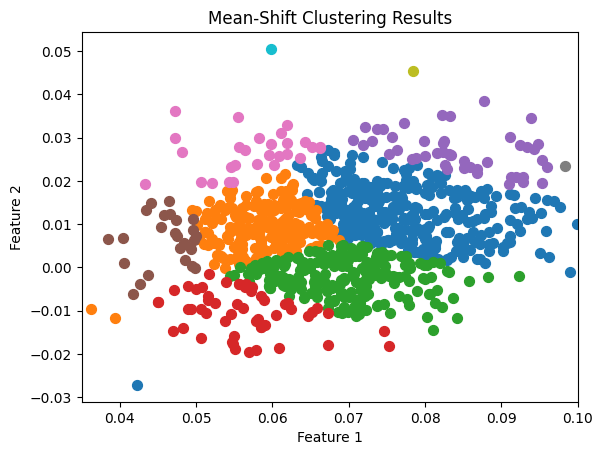

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
selected_columns = ['embed_210', 'embed_26']  # Replace with the actual column names
features = df[selected_columns].values

# Standardize your features (optional but often recommended for clustering)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Mean-Shift clustering with specified bandwidth for achieving 11 clusters
bandwidth = 0.634  # Experiment with different values
mean_shift = MeanShift(bandwidth=bandwidth)
labels = mean_shift.fit_predict(features_standardized)

# Get unique colors for each cluster
unique_colors = np.unique(labels)

# Visualize the clustering results with different colors for different clusters
for cluster in unique_colors:
    cluster_points = features[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', s=50)
plt.xlim(0.035, 0.1)  # Replace x_min and x_max with your desired limits
plt.title('Mean-Shift Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


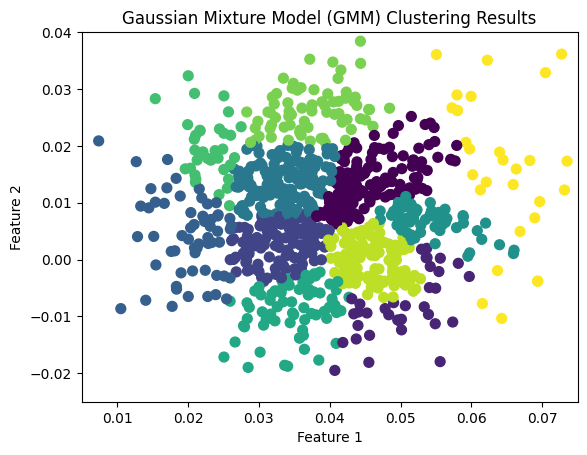

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
selected_columns = ['embed_10', 'embed_26']  # Replace with the actual column names
features = df[selected_columns].values

# Standardize your features (often recommended for GMM)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Gaussian Mixture Model (GMM) clustering
n_components = 11  # Choose the number of components (clusters)
gmm = GaussianMixture(n_components=n_components, random_state=42)
labels = gmm.fit_predict(features_standardized)

# Visualize the clustering results
plt.xlim(0.005, 0.075)
plt.ylim(-0.025, 0.04)
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Gaussian Mixture Model (GMM) Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


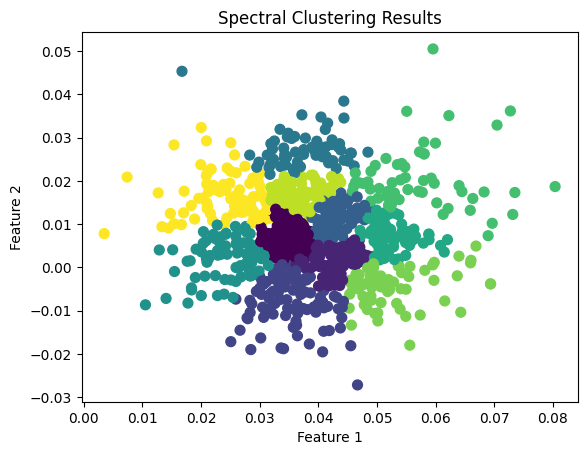

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
features = df.iloc[:, [10, 26]].values  # Adjust the column indices for the two features you want to use

# Standardize your features (often recommended for clustering)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Spectral Clustering
n_clusters = 11  # Choose the number of clusters
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
labels = spectral_clustering.fit_predict(features_standardized)

# Visualize the clustering results
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Spectral Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


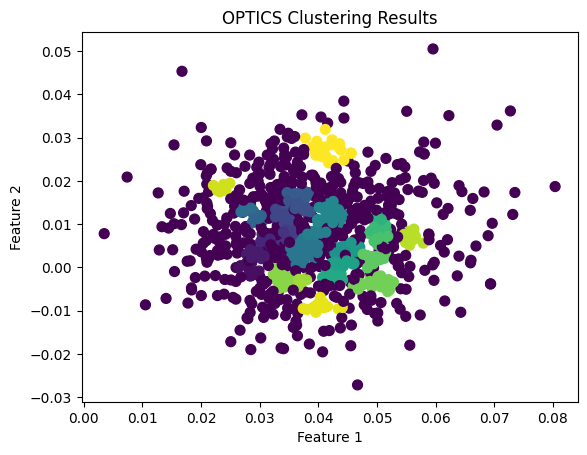

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
features = df.iloc[:, [10, 26]].values  # Adjust the column indices for the two features you want to use

# Standardize your features (often recommended for clustering)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# OPTICS clustering
optics = OPTICS(min_samples=10, xi=0.015, min_cluster_size=0.005)
labels = optics.fit_predict(features_standardized)

# Visualize the clustering results
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', s=50)
plt.title('OPTICS Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


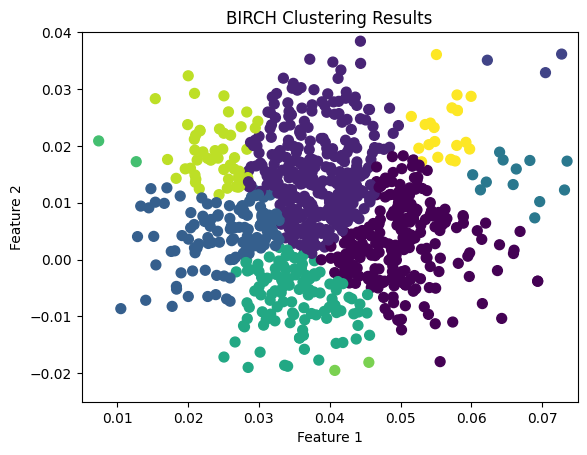

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
selected_columns = ['embed_10', 'embed_26']  # Replace with the actual column names
features = df[selected_columns].values

# Standardize your features (often recommended for clustering)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# BIRCH clustering
birch = Birch(threshold=0.5, n_clusters=11)  # Adjust threshold and n_clusters as needed
labels = birch.fit_predict(features_standardized)

# Visualize the clustering results
plt.xlim(0.005, 0.075)
plt.ylim(-0.025, 0.04)
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', s=50)
plt.title('BIRCH Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


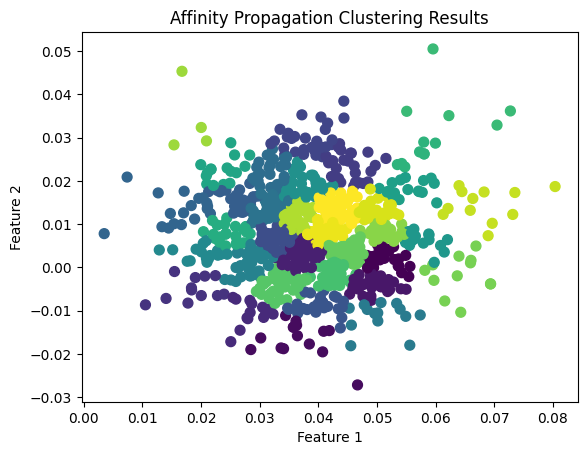

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
features = df.iloc[:, [10, 26]].values  # Adjust the column indices for the two features you want to use

# Standardize your features (often recommended for clustering)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Affinity Propagation clustering
affinity_propagation = AffinityPropagation()
labels = affinity_propagation.fit_predict(features_standardized)

# Visualize the clustering results
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Affinity Propagation Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [88]:
!pip install sklearn-learn-extra

ERROR: Could not find a version that satisfies the requirement sklearn-learn-extra (from versions: none)
ERROR: No matching distribution found for sklearn-learn-extra


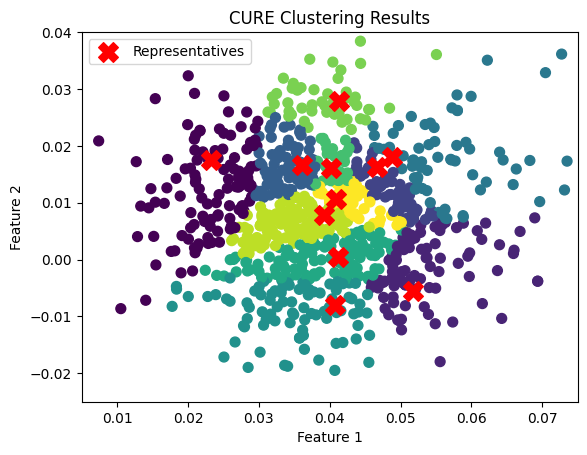

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
X = df[['embed_10', 'embed_26']].values  # Adjust column names as per your dataset

# Hyperparameters
k_clusters = 11  # Number of clusters
rep_factor = 0.02  # Fraction of representatives to keep

# Function to calculate Euclidean distance between two points
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# Function to find the closest point to a given point in a set of points
def find_closest(point, points):
    distances = [euclidean_distance(point, p) for p in points]
    closest_index = np.argmin(distances)
    return closest_index

# Function to perform CURE clustering
def cure_clustering(X, k_clusters, rep_factor):
    n_samples, n_features = X.shape

    # Randomly select representatives for each cluster
    representatives = X[np.random.choice(n_samples, size=k_clusters, replace=False)]

    # Merge representatives to reduce their number
    while len(representatives) > int(rep_factor * n_samples):
        # Find the two closest representatives
        i, j = np.unravel_index(np.argmin(np.linalg.norm(representatives[:, np.newaxis] - representatives, axis=-1) + np.eye(len(representatives)) * np.inf), (len(representatives), len(representatives)))

        # Merge the two closest representatives
        representatives[i] = np.mean([representatives[i], representatives[j]], axis=0)

        # Remove the j-th representative
        representatives = np.delete(representatives, j, axis=0)

    # Assign each point to the closest representative
    labels = [find_closest(point, representatives) for point in X]

    return labels, representatives

# Perform CURE clustering
labels, representatives = cure_clustering(X, k_clusters, rep_factor)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.xlim(0.005, 0.075)
plt.ylim(-0.025, 0.04)
plt.scatter(representatives[:, 0], representatives[:, 1], c='red', marker='X', s=200, label='Representatives')
plt.title('CURE Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

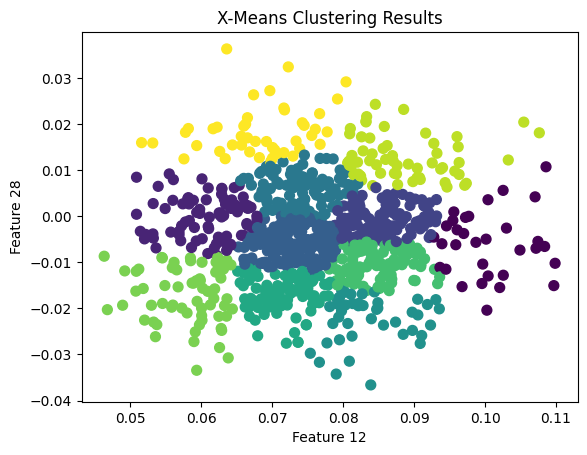

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
X = df.iloc[:, 1:].values  # Adjust the column indices as per your dataset

# Choose the two features you want to use for clustering
feature1_index = 11  # Replace with the actual index of your first feature
feature2_index = 27  # Replace with the actual index of your second feature
X_2d = X[:, [feature1_index, feature2_index]]

# Standardize your features (often recommended for clustering)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_2d)

# Function to perform X-Means clustering
def xmeans_clustering(X, max_clusters):
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X)
    bic = []

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        bic.append(kmeans.inertia_)

    # Find the optimal number of clusters using the Bayesian Information Criterion (BIC)
    optimal_k = np.argmin(bic) + 2  # Add 2 because we start from k=2

    # Perform K-Means clustering with the optimal number of clusters
    kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
    labels = kmeans_optimal.fit_predict(X)

    return labels

# Perform X-Means clustering
max_clusters = 11  # Set the maximum number of clusters to 11
cluster_labels = xmeans_clustering(X_standardized, max_clusters)

# Visualize the clustering results
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('X-Means Clustering Results')
plt.xlabel(f'Feature {feature1_index + 1}')
plt.ylabel(f'Feature {feature2_index + 1}')
plt.show()


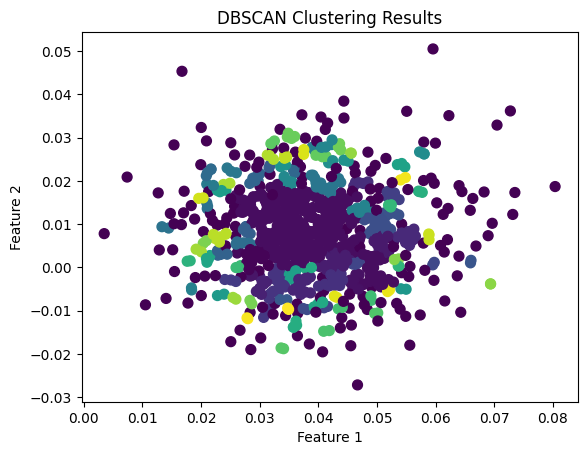

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
X = df[['embed_10', 'embed_26']].values  # Adjust column names as per your dataset

# Standardize your features (often recommended for clustering)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Function to perform DBSCAN clustering
def dbscan_clustering(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return labels

# Set the parameters for DBSCAN
eps = 0.11 # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 2 # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Perform DBSCAN clustering
cluster_labels = dbscan_clustering(X_standardized, eps, min_samples)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


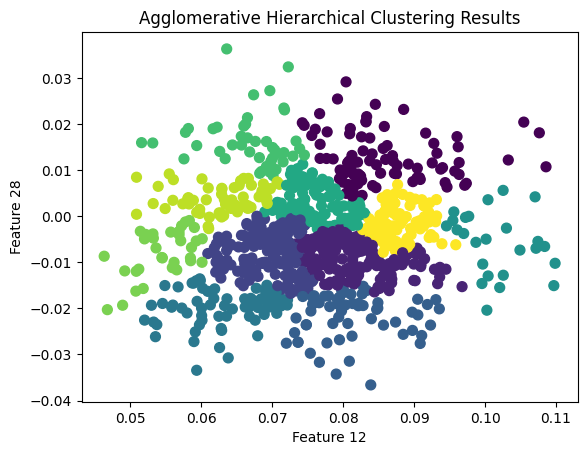

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
X = df.iloc[:, 1:].values  # Adjust the column indices as per your dataset

# Choose the two features you want to use for clustering
feature1_index = 11  # Replace with the actual index of your first feature
feature2_index = 27 # Replace with the actual index of your second feature
X_2d = X[:, [feature1_index, feature2_index]]

# Standardize your features (often recommended for clustering)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_2d)

# Set the number of clusters
n_clusters = 11  # Adjust as needed

# Perform Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = agg_clustering.fit_predict(X_standardized)

# Visualize the clustering results
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Hierarchical Clustering Results')
plt.xlabel(f'Feature {feature1_index + 1}')
plt.ylabel(f'Feature {feature2_index + 1}')
plt.show()


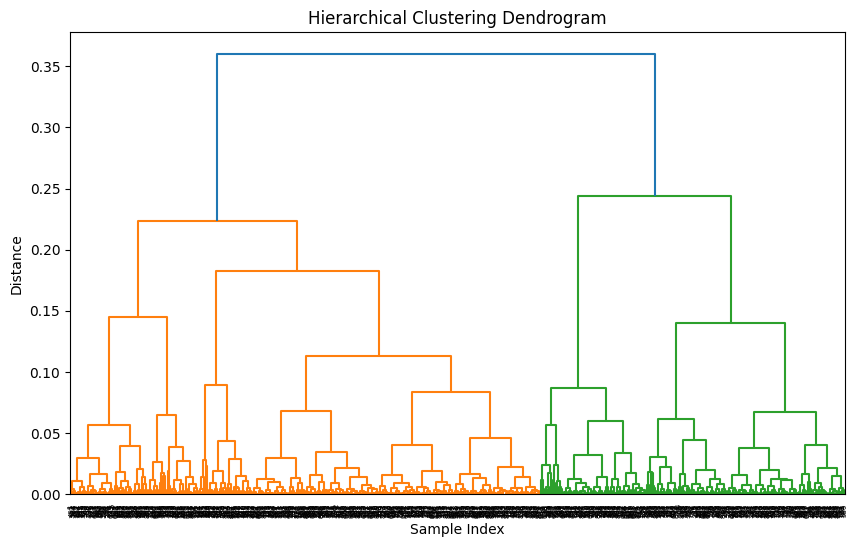

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


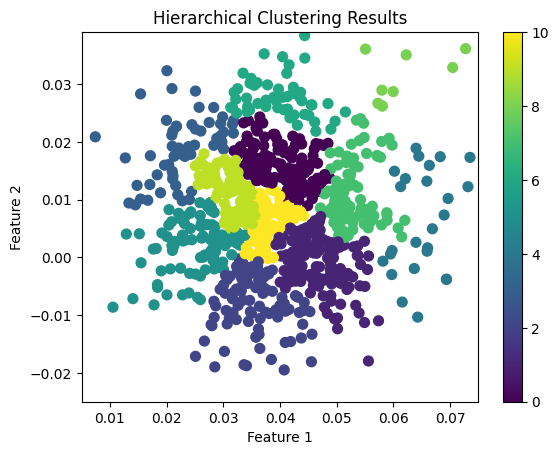

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
selected_columns = ['embed_10', 'embed_26']  # Replace with the actual column names
features = df[selected_columns].values

# Hierarchical clustering
linkage_matrix = linkage(features, method='ward')  # You can choose a different method as well

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Agglomerative clustering
n_clusters = 11  # Choose the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(features)

plt.xlim(0.005, 0.075)  # Replace x_min and x_max with your desired limits
plt.ylim(-0.025, 0.039)
# Visualize the clustering results
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Hierarchical Clustering Results')
plt.colorbar()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [80]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Assuming your dataset has features in columns, you might want to select relevant columns
# Make sure to adapt this to your dataset structure
X = df[['embed_10', 'embed_26']].values  # Adjust column names as per your dataset

# Standardize your features (recommended for clustering)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Set the number of clusters (k)
k_clusters = 3  # Adjust as needed

# K-Means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_standardized)

# Compute the Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X_standardized, cluster_labels)

print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calinski-Harabasz Index: 517.985547179567
